<a href="https://colab.research.google.com/github/Polinnii/my/blob/main/TextMining2024_2211_%D0%9D%D0%B0%D0%B7%D0%B0%D1%80%D0%BE%D0%B2%D0%B0_%D0%9F%D0%BE%D0%BB%D0%B8%D0%BD%D0%B0_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [350]:
import pandas as pd
import requests
import nltk
import json

In [351]:
group_name = 'lovensu'

payload = {
    'access_token' : '8eae5d578eae5d578eae5d57128db1284888eae8eae5d57e8559d96af168967d0b87324',#я вам доверяю, не крадите мои данные, пожалуйста
    'domain' : group_name,
    'v' : '5.199'
}

r = requests.get('https://api.vk.com/method/wall.get', params=payload)

**Парсим данные**

In [352]:
r.json()["response"]["items"][2]

{'inner_type': 'wall_wallpost',
 'donut': {'is_donut': False},
 'comments': {'count': 2},
 'marked_as_ads': 0,
 'hash': '6sfyYZ9VrwCRCOwqtw',
 'type': 'post',
 'attachments': [],
 'date': 1728529138,
 'from_id': -58762424,
 'id': 144676,
 'likes': {'can_like': 0, 'count': 14, 'user_likes': 0},
 'reaction_set_id': 'reactions',
 'reactions': {'count': 14, 'items': [{'id': 0, 'count': 14}]},
 'owner_id': -58762424,
 'post_type': 'post',
 'reposts': {'count': 0},
 'text': 'Полина Датта у тебя потрясающие кудряшки великолепное чувство юмора и просто драгоценная персоналити я люблю тебя всем сердцем 🤍🤍🤍🤍🤍',
 'views': {'count': 1786}}

In [353]:
result = []
for cur_item in r.json()["response"]["items"]:
    cur_item_dict = {
        "text" : cur_item["text"],
        "date" : cur_item["date"],
        "views" : cur_item["views"]["count"],
        "likes" : cur_item["likes"]["count"],
        "reposts" : cur_item["reposts"]["count"]
    }
    result.append(cur_item_dict)

**Предобрабатываем текст**

In [354]:
from nltk import ngrams, FreqDist

df = pd.DataFrame(result)

df["date"] = pd.to_datetime(df["date"], unit='s')
df["text"] = df["text"].str.replace(r"[^A-я\s\-0-9\\p{P}]", "", regex=True)
df["text"] = df["text"].str.replace(r"\n", "", regex=True)
df["text"] = df["text"].str.lower()

df["text_count"] = df["text"].apply(lambda x: FreqDist(ngrams(x, 5)))
date_filtered = df[(df['date'] >= '2024-01-25') & (df['date'] <= '2024-05-25')]

In [355]:
date_filtered

,text,date,views,likes,reposts,text_count


In [356]:
df

,text,date,views,likes,reposts,text_count
0,признавашка девушке с золотыми волосами даше с...,2024-10-10 02:59:32,2275,6,10,"{('п', 'р', 'и', 'з', 'н'): 1, ('р', 'и', 'з',..."
1,спасибо девочкам которые очень шпотом разговар...,2024-10-10 02:59:18,2481,24,1,"{('с', 'п', 'а', 'с', 'и'): 2, ('п', 'а', 'с',..."
2,полина датта у тебя потрясающие кудряшки велик...,2024-10-10 02:58:58,1786,14,0,"{('п', 'о', 'л', 'и', 'н'): 1, ('о', 'л', 'и',..."
3,признавашка улыбчивой блондинке с третьего-чет...,2024-10-10 02:58:40,1630,1,5,"{('п', 'р', 'и', 'з', 'н'): 1, ('р', 'и', 'з',..."
4,признавашка организаторам лесной посвяги фен э...,2024-10-08 00:18:33,3734,117,6,"{('п', 'р', 'и', 'з', 'н'): 1, ('р', 'и', 'з',..."
5,культурный 19летний клоун ищет клоунку живу в ...,2024-10-08 00:18:28,2900,1,16,"{('к', 'у', 'л', 'ь', 'т'): 1, ('у', 'л', 'ь',..."
6,пост для девушек которые ищут только серьезные...,2024-10-08 00:18:00,3035,10,31,"{('п', 'о', 'с', 'т', ' '): 1, ('о', 'с', 'т',..."
7,признавашка всем тем кто хочет открыться прекр...,2024-10-08 00:17:35,2659,11,0,"{('п', 'р', 'и', 'з', 'н'): 1, ('р', 'и', 'з',..."
8,в пятницу в районе 1340-14 часов ты стояла пер...,2024-10-08 00:17:25,1737,0,2,"{('в', ' ', 'п', 'я', 'т'): 1, (' ', 'п', 'я',..."
9,признавашка высокой девушке из 1 блока нк ещ м...,2024-10-08 00:16:55,1674,1,1,"{('п', 'р', 'и', 'з', 'н'): 1, ('р', 'и', 'з',..."


In [357]:
from tqdm import tqdm


In [358]:
all_posts_group = []
for number in tqdm(range(0, 500, 100)):
  offset = number
  wall = requests.get(
    wall_get_url,
    params={
        "owner_id": -58762424,
        "count": 100,
        "v": 5.81,
        'offset':offset,
        "access_token": my_token}).json()
  posts = wall.get('response').get('items')
  all_posts_group.extend(posts)

100%|██████████| 5/5 [00:03<00:00,  1.27it/s]


In [359]:
posts_info = []
for post in all_posts_group:
    posts_info.append([post['id'],
                      post['text'],
                      post['views']['count'],
                      post['likes']['count'],
                      post['reposts']['count'],
                      str(datetime.fromtimestamp(post['date']))])
len(posts_info)

500

**Импортируем в пандас**

In [360]:
import pandas as pd
all_posts_group= pd.DataFrame(posts_info, columns=['id', 'text', 'views',
                                   'likes', 'reposts', 'date'])
all_posts_group.head()


,id,text,views,likes,reposts,date
0,144678,Признавашка девушке с золотыми волосами Даше С...,2275,6,10,2024-10-10 02:59:32
1,144677,"Спасибо девочкам, которые очень шёпотом разгов...",2481,24,1,2024-10-10 02:59:18
2,144676,Полина Датта у тебя потрясающие кудряшки велик...,1786,14,0,2024-10-10 02:58:58
3,144675,Признавашка улыбчивой блондинке с третьего-чет...,1630,1,5,2024-10-10 02:58:40
4,144633,Признавашка организаторам лесной посвяги ФЕН. ...,3734,117,6,2024-10-08 00:18:33


In [361]:
df['text']

,text
0,признавашка девушке с золотыми волосами даше с...
1,спасибо девочкам которые очень шпотом разговар...
2,полина датта у тебя потрясающие кудряшки велик...
3,признавашка улыбчивой блондинке с третьего-чет...
4,признавашка организаторам лесной посвяги фен э...
5,культурный 19летний клоун ищет клоунку живу в ...
6,пост для девушек которые ищут только серьезные...
7,признавашка всем тем кто хочет открыться прекр...
8,в пятницу в районе 1340-14 часов ты стояла пер...
9,признавашка высокой девушке из 1 блока нк ещ м...


In [362]:
df['views']

,views
0,2275
1,2481
2,1786
3,1630
4,3734
5,2900
6,3035
7,2659
8,1737
9,1674


In [363]:
df['reposts']

,reposts
0,10
1,1
2,0
3,5
4,6
5,16
6,31
7,0
8,2
9,1


In [364]:
#в данных аномалий не наблюдается, пропусков нет, все относительно равномерно наполненно

In [365]:
import re


In [366]:
df['text'] = df['text'].apply(lambda x: ' '.join(re.findall(r'\b\w+\b', str(x).lower())))
df

,text,date,views,likes,reposts,text_count
0,признавашка девушке с золотыми волосами даше с...,2024-10-10 02:59:32,2275,6,10,"{('п', 'р', 'и', 'з', 'н'): 1, ('р', 'и', 'з',..."
1,спасибо девочкам которые очень шпотом разговар...,2024-10-10 02:59:18,2481,24,1,"{('с', 'п', 'а', 'с', 'и'): 2, ('п', 'а', 'с',..."
2,полина датта у тебя потрясающие кудряшки велик...,2024-10-10 02:58:58,1786,14,0,"{('п', 'о', 'л', 'и', 'н'): 1, ('о', 'л', 'и',..."
3,признавашка улыбчивой блондинке с третьего чет...,2024-10-10 02:58:40,1630,1,5,"{('п', 'р', 'и', 'з', 'н'): 1, ('р', 'и', 'з',..."
4,признавашка организаторам лесной посвяги фен э...,2024-10-08 00:18:33,3734,117,6,"{('п', 'р', 'и', 'з', 'н'): 1, ('р', 'и', 'з',..."
5,культурный 19летний клоун ищет клоунку живу в ...,2024-10-08 00:18:28,2900,1,16,"{('к', 'у', 'л', 'ь', 'т'): 1, ('у', 'л', 'ь',..."
6,пост для девушек которые ищут только серьезные...,2024-10-08 00:18:00,3035,10,31,"{('п', 'о', 'с', 'т', ' '): 1, ('о', 'с', 'т',..."
7,признавашка всем тем кто хочет открыться прекр...,2024-10-08 00:17:35,2659,11,0,"{('п', 'р', 'и', 'з', 'н'): 1, ('р', 'и', 'з',..."
8,в пятницу в районе 1340 14 часов ты стояла пер...,2024-10-08 00:17:25,1737,0,2,"{('в', ' ', 'п', 'я', 'т'): 1, (' ', 'п', 'я',..."
9,признавашка высокой девушке из 1 блока нк ещ м...,2024-10-08 00:16:55,1674,1,1,"{('п', 'р', 'и', 'з', 'н'): 1, ('р', 'и', 'з',..."


In [367]:
date_filtered = df[(df['date'] >= '2024-01-01') & (df['date'] <= '2024-02-28')]
date_filtered

,text,date,views,likes,reposts,text_count


**Часто встречающиеся слова**

In [368]:
from nltk.probability import FreqDist
import nltk

all_words = nltk.word_tokenize(' '.join(df['text']))
fdist = FreqDist(all_words)
common_words = fdist.most_common(50)
for i, x in common_words:
    print(f'{i} встречается {x} раз')

в встречается 28 раз
и встречается 13 раз
с встречается 8 раз
на встречается 8 раз
признавашка встречается 6 раз
ты встречается 6 раз
очень встречается 4 раз
я встречается 4 раз
из встречается 4 раз
блока встречается 4 раз
это встречается 4 раз
тебе встречается 4 раз
найдись встречается 4 раз
девушке встречается 3 раз
было встречается 3 раз
пожалуйста встречается 3 раз
у встречается 3 раз
тебя встречается 3 раз
всем встречается 3 раз
который встречается 3 раз
1 встречается 3 раз
волосами встречается 2 раз
девушка встречается 2 раз
которые встречается 2 раз
2 встречается 2 раз
мне встречается 2 раз
вы встречается 2 раз
ищет встречается 2 раз
отношения встречается 2 раз
ищу встречается 2 раз
не встречается 2 раз
о встречается 2 раз
а встречается 2 раз
перед встречается 2 раз
по встречается 2 раз
был встречается 2 раз
место встречается 2 раз
то встречается 2 раз
очереди встречается 2 раз
золотыми встречается 1 раз
даше встречается 1 раз
свиридовой встречается 1 раз
вах встречается 1 раз
к

**Стоп-слова**

In [369]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))


def remove_stopwords(text):
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)


df['text'] = df['text'].fillna('').apply(remove_stopwords)

all_words = nltk.word_tokenize(' '.join(df['text']))
frequency = FreqDist(all_words)
common_words = fdist.most_common(50)
for i, j in common_words:
    print(f'{i} встречается {x} раз')

в встречается 1 раз
и встречается 1 раз
с встречается 1 раз
на встречается 1 раз
признавашка встречается 1 раз
ты встречается 1 раз
очень встречается 1 раз
я встречается 1 раз
из встречается 1 раз
блока встречается 1 раз
это встречается 1 раз
тебе встречается 1 раз
найдись встречается 1 раз
девушке встречается 1 раз
было встречается 1 раз
пожалуйста встречается 1 раз
у встречается 1 раз
тебя встречается 1 раз
всем встречается 1 раз
который встречается 1 раз
1 встречается 1 раз
волосами встречается 1 раз
девушка встречается 1 раз
которые встречается 1 раз
2 встречается 1 раз
мне встречается 1 раз
вы встречается 1 раз
ищет встречается 1 раз
отношения встречается 1 раз
ищу встречается 1 раз
не встречается 1 раз
о встречается 1 раз
а встречается 1 раз
перед встречается 1 раз
по встречается 1 раз
был встречается 1 раз
место встречается 1 раз
то встречается 1 раз
очереди встречается 1 раз
золотыми встречается 1 раз
даше встречается 1 раз
свиридовой встречается 1 раз
вах встречается 1 раз
как

**Какие самые часто встречающиеся слова у ТОП-100 постов по кол-ву лайков?**

In [370]:
posts_100 = df.sort_values(by=['likes'], ascending=False).head(100)
posts_100

,text,date,views,likes,reposts,text_count
4,признавашка организаторам лесной посвяги фен э...,2024-10-08 00:18:33,3734,117,6,"{('п', 'р', 'и', 'з', 'н'): 1, ('р', 'и', 'з',..."
14,это признание всем мальчикам парням мужчинам м...,2024-09-29 14:15:55,3334,31,16,"{('э', 'т', 'о', ' ', 'п'): 1, ('т', 'о', ' ',..."
1,спасибо девочкам которые очень шпотом разговар...,2024-10-10 02:59:18,2481,24,1,"{('с', 'п', 'а', 'с', 'и'): 2, ('п', 'а', 'с',..."
2,полина датта у тебя потрясающие кудряшки велик...,2024-10-10 02:58:58,1786,14,0,"{('п', 'о', 'л', 'и', 'н'): 1, ('о', 'л', 'и',..."
7,признавашка всем тем кто хочет открыться прекр...,2024-10-08 00:17:35,2659,11,0,"{('п', 'р', 'и', 'з', 'н'): 1, ('р', 'и', 'з',..."
6,пост для девушек которые ищут только серьезные...,2024-10-08 00:18:00,3035,10,31,"{('п', 'о', 'с', 'т', ' '): 1, ('о', 'с', 'т',..."
16,надеюсь найти в данной группе компанию с кем м...,2024-09-22 17:16:02,5123,9,8,"{('н', 'а', 'д', 'е', 'ю'): 1, ('а', 'д', 'е',..."
0,признавашка девушке с золотыми волосами даше с...,2024-10-10 02:59:32,2275,6,10,"{('п', 'р', 'и', 'з', 'н'): 1, ('р', 'и', 'з',..."
12,мальчик который играл в fruit ninja на кофейно...,2024-09-29 14:16:11,4491,2,3,"{('м', 'а', 'л', 'ь', 'ч'): 1, ('а', 'л', 'ь',..."
15,признавашка очаровательной девушке ярко красна...,2024-09-29 14:15:41,2771,2,4,"{('п', 'р', 'и', 'з', 'н'): 1, ('р', 'и', 'з',..."


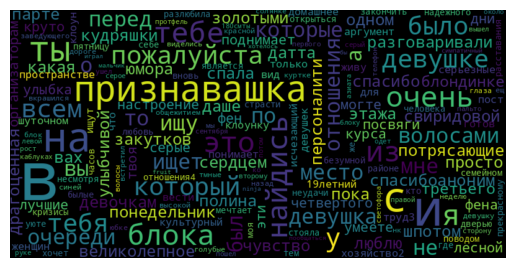

In [371]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

common_words = ' '.join(df['text'])
wc = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(common_words)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


**Визуализируйте (с использованием wordcloud) и сравните самые часто встречающиеся слова для постов за январь-февраль и март-апрель**

In [372]:
#пожалуйста, расскажите, как потом правильно - у меня либо мозг перестал работать, либо я не понимаю почему так...

In [373]:
jan_feb = df[(df['date'] >= '2024-01-01') & (df['date'] <= '2024-02-29')]['text']
mar_apr = df[(df['date'] >= '2024-03-31') & (df['date'] <= '2024-04-30')]['text']





In [374]:
wc_jan_feb = WordCloud(max_words=100).generate(jan_feb(df['text']).split())
plt.figure(figsize=(10, 10))
plt.imshow(wc_jan_feb)
plt.axis('off')
plt.title('Январь-февраль')

TypeError: 'Series' object is not callable